In [12]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from random import shuffle
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [3]:
#lto load model
from keras.models import load_model

In [4]:
train_datagen = ImageDataGenerator(
      samplewise_center=True,
      samplewise_std_normalization= True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')



test_generator =train_datagen.flow_from_directory(
     "input/datafinal/test",
     batch_size= 50,
     shuffle=shuffle,
     target_size=(300, 300)

)

Found 480 images belonging to 2 classes.


In [5]:
DenseNet=load_model("DenseNet-Binary.h5")

In [6]:
DenseNet.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])
DenseNet.evaluate(test_generator)

10/10 [==============================] - 37s 4s/step - loss: 0.4212 - accuracy: 0.9750


[0.42115476727485657, 0.9750000238418579]

In [7]:
DenseNetpred=DenseNet.predict(test_generator)

In [8]:
DenseNetpred_gene = DenseNet.predict_generator(test_generator, steps = len(test_generator))

Instructions for updating:
Please use Model.predict, which supports generators.


In [9]:
DenseNety_test=[]
for i in range(10):
    DenseNety_test.extend(test_generator.__getitem__(i)[1])

In [13]:
y_test =np.array(DenseNety_test) 
y_score = DenseNetpred_gene 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [14]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

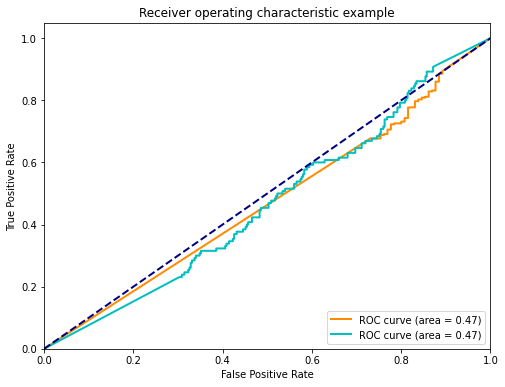

In [15]:
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[0], tpr[0], color='c',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [17]:
DenseNety_test=np.argmax(DenseNety_test,axis=1)
DenseNetpred= np.argmax(DenseNetpred,axis=1)

In [18]:
import collections

collections.Counter(DenseNety_test)

Counter({0: 130, 1: 350})

[[ 36 105]
 [ 94 245]]


<ipython-input-19-7d80ecb3ddf7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-19-7d80ecb3ddf7>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


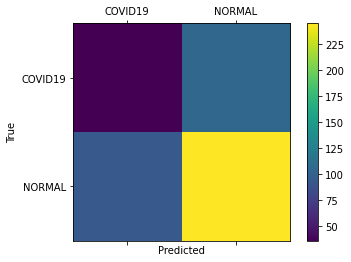

In [19]:
labels = [ "COVID19",'NORMAL']
cm=confusion_matrix(DenseNetpred,DenseNety_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
#plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()